# Final Report: HR Analysis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Cleaned Dataset
df = pd.read_excel('Hr_Analytics_Cleaned.xlsx')

In [3]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Category
0,RM297,18,18-25,1,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,80,0,0,2,3,0-3 years,0-2 years,0-4 years,0-4 years,Yes
1,RM302,18,18-25,0,Travel_Rarely,812,Sales,10,3,Medical,...,80,0,0,2,3,0-3 years,0-2 years,0-4 years,0-4 years,No
2,RM458,18,18-25,1,Travel_Frequently,1306,Sales,5,3,Marketing,...,80,0,0,3,3,0-3 years,0-2 years,0-4 years,0-4 years,Yes
3,RM728,18,18-25,0,Non-Travel,287,Research & Development,5,2,Life Sciences,...,80,0,0,2,3,0-3 years,0-2 years,0-4 years,0-4 years,No
4,RM829,18,18-25,1,Non-Travel,247,Research & Development,8,1,Medical,...,80,0,0,0,3,0-3 years,0-2 years,0-4 years,0-4 years,Yes


In [4]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_Category'],
      dtype='object')

In [5]:
! pip install nbformat>=4.2.0

### Count of Attrition

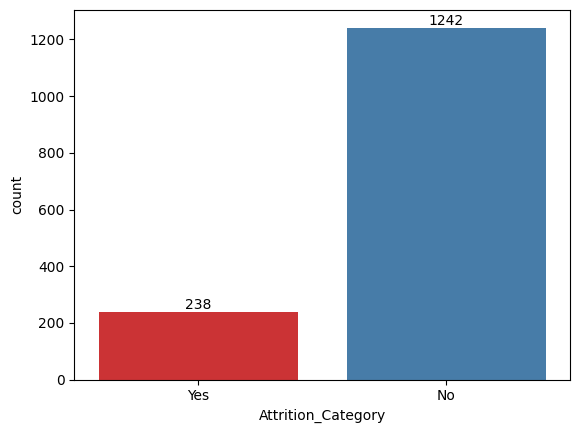

In [6]:
ax = sns.countplot(data = df, x = "Attrition_Category", palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [7]:
import plotly.express as px

# Get counts first
attrition_counts = df['Attrition_Category'].value_counts().reset_index()
attrition_counts.columns = ['Attrition_Category', 'Count']

# Create Plotly bar chart
fig = px.bar(attrition_counts, 
             x='Attrition_Category', 
             y='Count', 
             text='Count', 
             color='Attrition_Category', 
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')  # Show counts above bars
fig.update_layout(title='Attrition Count',
                  xaxis_title='Attrition Category',
                  yaxis_title='Count',
                  width=700,
                  height=500)

fig.show()


238 employees have left the company

### Count of Attrition by Age Group

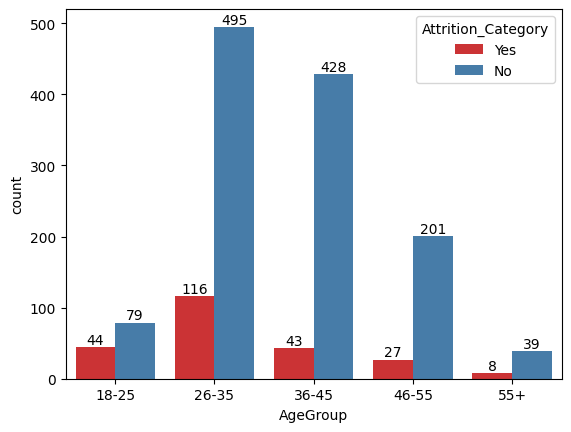

In [8]:
ax = sns.countplot(data = df, x = 'AgeGroup', hue = 'Attrition_Category', palette = 'Set1')

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [9]:
import plotly.express as px

# Group data to get counts per Attrition_Category and AgeGroup
grouped_counts = df.groupby(['Attrition_Category', 'AgeGroup']).size().reset_index(name='Count')

# Create Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='AgeGroup',
             barmode='group',
             text='Count',  # Display counts on bars
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(title='Attrition Count by Age Group',
                  xaxis_title='Attrition Category',
                  yaxis_title='Count',
                  legend_title='Age Group',
                  width=900,
                  height=500)

fig.show()


The highest number of employees who left the company belong to 26-35 age group.

### Count of Attrition by Gender

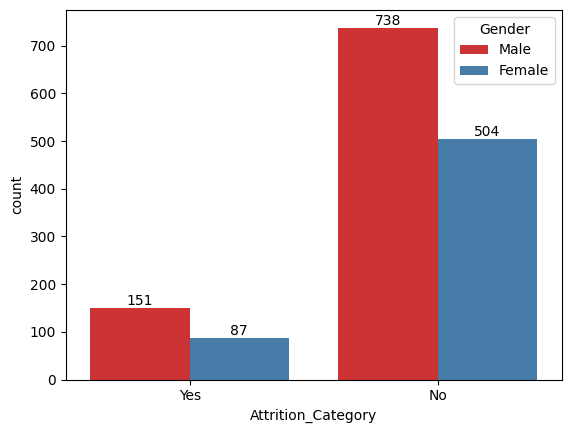

In [10]:
ax = sns.countplot(data = df, x = 'Attrition_Category', hue = 'Gender', palette = 'Set1')

for bars in ax.containers:
    ax.bar_label(bars)  

#### Plotly Code

In [11]:
import plotly.express as px

# Create grouped count data
grouped_counts = df.groupby(['Attrition_Category', 'Gender']).size().reset_index(name='Count')

# Plotly bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='Gender',
             barmode='group',
             text='Count',  # Show counts on top of bars
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(title='Attrition Count by Gender',
                  xaxis_title='Attrition Category',
                  yaxis_title='Count',
                  width=800,
                  height=500)

fig.show()


The 63% of employees who left the company are Males and 36% are Females. The Attrition Rate of Males are high.

### Count of Attrition by Department

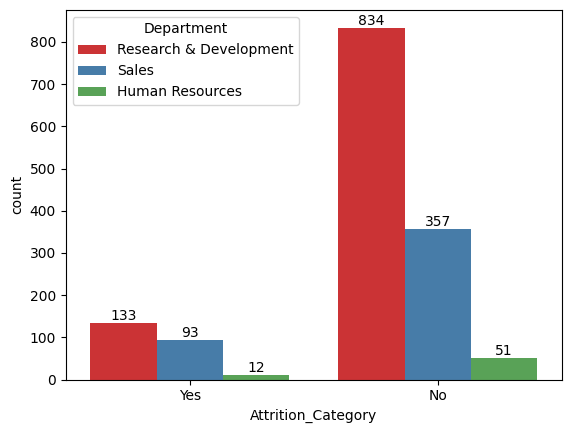

In [12]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'Department', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [13]:
import plotly.express as px

# Prepare grouped counts
grouped_counts = df.groupby(['Attrition_Category', 'Department']).size().reset_index(name='Count')

# Create Plotly bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='Department',
             barmode='group',
             text='Count',  # Show counts on top of bars
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(title='Attrition Count by Department',
                  xaxis_title='Attrition Category',
                  yaxis_title='Count',
                  width=900,
                  height=500)

fig.show()


The 56% of employees who left the company belong to Research and Development and 39% belong to Sales and others belong to HR. The Attrition Rate of Research and Development is high. 

### Count of Attrition by EducationField

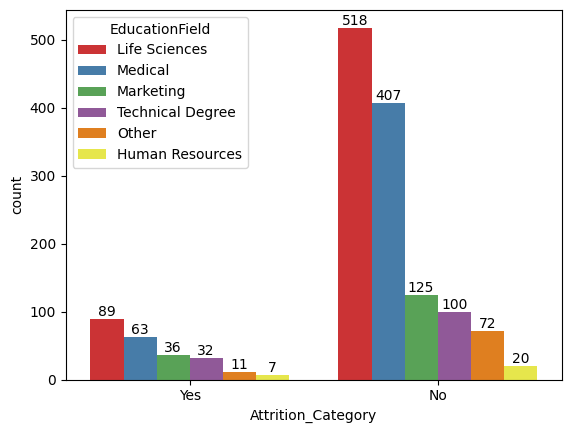

In [14]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'EducationField', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)


#### Plotly Code

In [15]:
import plotly.express as px

# Prepare grouped counts
grouped_counts = df.groupby(['Attrition_Category', 'EducationField']).size().reset_index(name='Count')

# Create Plotly bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='EducationField',
             barmode='group',
             text='Count',  # Show counts on bars
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(title='Attrition Count by Education Field',
                  xaxis_title='Attrition Category',
                  yaxis_title='Count',
                  width=1000,
                  height=500)

fig.show()


The Percentage of Employees who left the company according to their education field: 37% LifeSciences, 26% Medical, 15% Marketing, 13% Technical Degree, 5% Other, 3% HR.
The Attrition rate of Life Science is high, but not very high because the Medical Percentage is close to it.

### Count of Attrition by Education

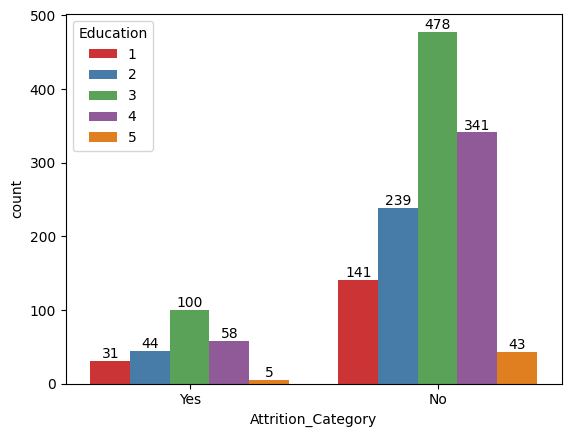

In [16]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'Education', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [17]:
import plotly.express as px

# Map numeric education codes to readable categories
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

df['Education_Mapped'] = df['Education'].map(education_map)

# Prepare grouped counts
grouped_counts = df.groupby(['Attrition_Category', 'Education_Mapped']).size().reset_index(name='Count')

# Create Plotly bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='Education_Mapped',
             barmode='group',
             text='Count',  # Show counts on bars
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(title='Attrition Count by Education Level',
                  xaxis_title='Attrition Category',
                  yaxis_title='Count',
                  legend_title='Education Level',
                  width=900,
                  height=500)

fig.show()


The Percentage of Employees who left the company according to their education: Bachelor = 42%, Master = 24%, College = 18%, Below College = 13%, Doctor = 2%.
The Attrtion Rate of Bachelor Employees are High.

### Count of Attrition by EnvironmentSatisfaction

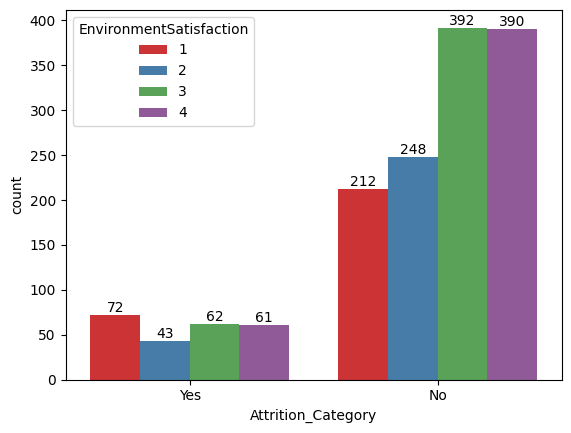

In [18]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'EnvironmentSatisfaction', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [19]:
import plotly.express as px

# Map EnvironmentSatisfaction values to something more descriptive (optional but recommended)
env_sat_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df['EnvironmentSatisfaction_Mapped'] = df['EnvironmentSatisfaction'].map(env_sat_map)

# Group data to get counts
grouped_counts = df.groupby(['Attrition_Category', 'EnvironmentSatisfaction_Mapped']).size().reset_index(name='Count')

# Create Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='EnvironmentSatisfaction_Mapped',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(title='Attrition Count by Environment Satisfaction',
                  xaxis_title='Attrition Category',
                  yaxis_title='Count',
                  legend_title='Environment Satisfaction',
                  width=900,
                  height=500)

fig.show()


The Attrition Rate according to environment satisfaction: Low = 30%, High = 26%, Very High = 25.6%, Medium = 18%. The Attrition rate of those employees who are less satisfied with environment in high. But the values of other categories are very close to less satisfied employees count.

### Count of Attrition by JobInvolvement

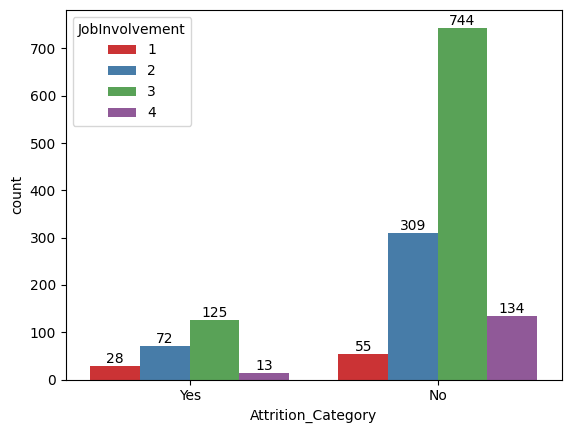

In [20]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'JobInvolvement', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [21]:
import plotly.express as px

# (Optional but recommended) Map JobInvolvement numeric values to meaningful labels
job_involvement_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df['JobInvolvement_Mapped'] = df['JobInvolvement'].map(job_involvement_map)

# Prepare grouped counts
grouped_counts = df.groupby(['Attrition_Category', 'JobInvolvement_Mapped']).size().reset_index(name='Count')

# Create Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='JobInvolvement_Mapped',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Attrition Count by Job Involvement',
    xaxis_title='Attrition Category',
    yaxis_title='Count',
    legend_title='Job Involvement',
    width=900,
    height=500
)

fig.show()


The percentage job involvement of employees who left the company are: High = 52%, Medium = 30 , Low = 12% , Very High = 5%. Most of the employees who left the company have higher Job Involvement.

### Count of Attrition by JobLevel

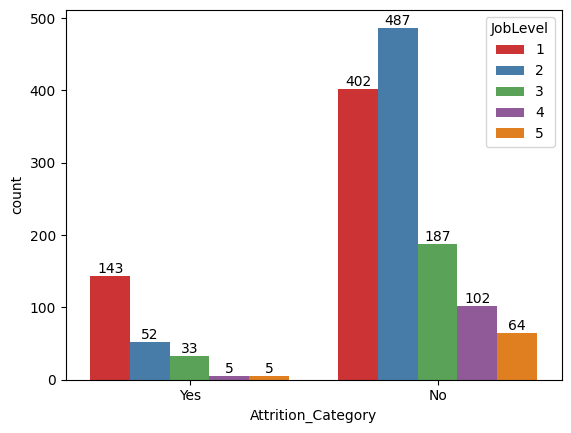

In [22]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'JobLevel', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [23]:
import plotly.express as px

# (Optional) Map JobLevel numbers to descriptive labels for HR readability
job_level_map = {
    1: 'Entry Level',
    2: 'Mid Level',
    3: 'Senior',
    4: 'Manager',
    5: 'Executive'
}
df['JobLevel_Mapped'] = df['JobLevel'].map(job_level_map)

# Prepare grouped counts
grouped_counts = df.groupby(['Attrition_Category', 'JobLevel_Mapped']).size().reset_index(name='Count')

# Create Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='JobLevel_Mapped',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Attrition Count by Job Level',
    xaxis_title='Attrition Category',
    yaxis_title='Count',
    legend_title='Job Level',
    width=900,
    height=500
)

fig.show()


The 60% of employees who left the company was on Entry Level. 23% was on Mid Level and 14% was Senior.

### Count of Attrition by JobRole

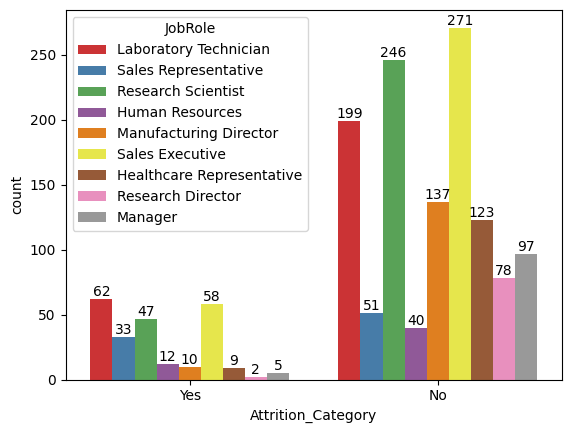

In [24]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'JobRole', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [25]:
import plotly.express as px

# Group data to get counts for each Attrition_Category × JobRole
grouped_counts = df.groupby(['Attrition_Category', 'JobRole']).size().reset_index(name='Count')

# Create interactive Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='JobRole',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1_r)

# Customize chart layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Attrition Count by Job Role',
    xaxis_title='Attrition Category',
    yaxis_title='Count',
    legend_title='Job Role',
    width=1000,  # wider for better legend readability
    height=550
)

fig.show()


26% of employees who left the company was laboratory technician, 24% was sales executive, 16% was Research Scientist and 14% was Sales Representative. Other job roles have some lower attrition rate.

### Count of Attrition by JobSatisfaction

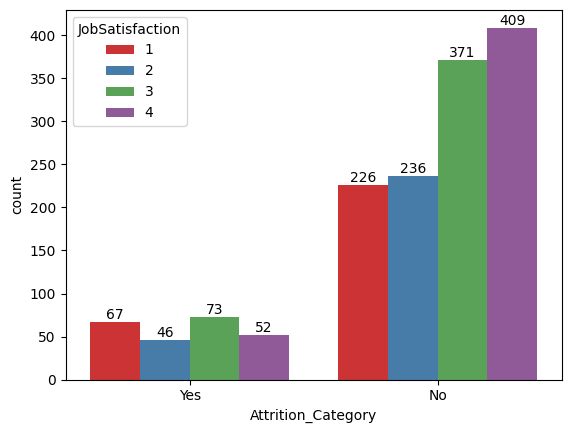

In [26]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'JobSatisfaction', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [27]:
import plotly.express as px

# (Optional) Map JobSatisfaction numeric values to descriptive labels for readability
job_satisfaction_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df['JobSatisfaction_Mapped'] = df['JobSatisfaction'].map(job_satisfaction_map)

# Group data to get counts for each combination
grouped_counts = df.groupby(['Attrition_Category', 'JobSatisfaction_Mapped']).size().reset_index(name='Count')

# Create Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='JobSatisfaction_Mapped',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Attrition Count by Job Satisfaction',
    xaxis_title='Attrition Category',
    yaxis_title='Count',
    legend_title='Job Satisfaction',
    width=900,
    height=500
)

fig.show()


High, Low, Medium, Very High, every job satisfaction scale have close values of Attrition. Not a single scale has very high value.

### Count of Attrition by RelationshipSatisfaction

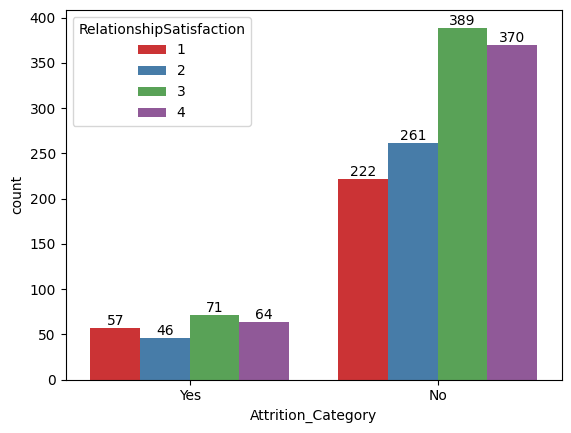

In [28]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'RelationshipSatisfaction', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [29]:
import plotly.express as px

# (Optional) Map numeric satisfaction levels to descriptive labels
relationship_sat_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
df['RelationshipSatisfaction_Mapped'] = df['RelationshipSatisfaction'].map(relationship_sat_map)

# Group data to get counts for each Attrition_Category × RelationshipSatisfaction
grouped_counts = df.groupby(['Attrition_Category', 'RelationshipSatisfaction_Mapped']).size().reset_index(name='Count')

# Create interactive Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='RelationshipSatisfaction_Mapped',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize chart layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Attrition Count by Relationship Satisfaction',
    xaxis_title='Attrition Category',
    yaxis_title='Count',
    legend_title='Relationship Satisfaction',
    width=900,
    height=500
)

fig.show()


High, Low, Medium, Very High, every relatioship satisfaction scale have close values of Attrition. Not a single scale has very high value.

### Count of Attrition by MaritalStatus

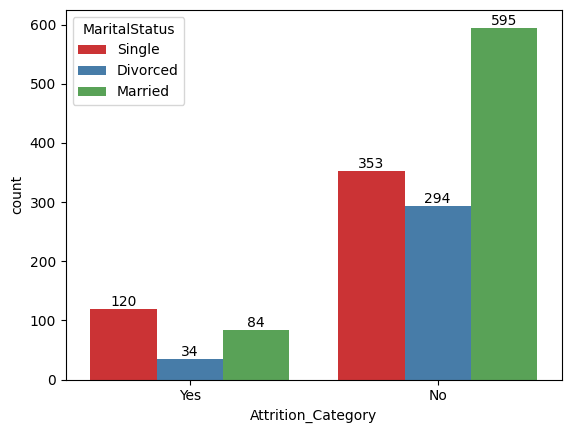

In [30]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'MaritalStatus', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [31]:
import plotly.express as px

# Group data to get counts for each Attrition_Category × MaritalStatus
grouped_counts = df.groupby(['Attrition_Category', 'MaritalStatus']).size().reset_index(name='Count')

# Create interactive Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='MaritalStatus',
             barmode='group',
             text='Count',  # show counts on top of bars
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Attrition Count by Marital Status',
    xaxis_title='Attrition Category',
    yaxis_title='Count',
    legend_title='Marital Status',
    width=900,
    height=500
)

fig.show()


Percentage of employess according their Marital Status: Single = 50%, Married = 35%, Divorced = 14%. Most of the employees who left the company are single.

### Average MonthlyIncome and SalarySlab By Attrition

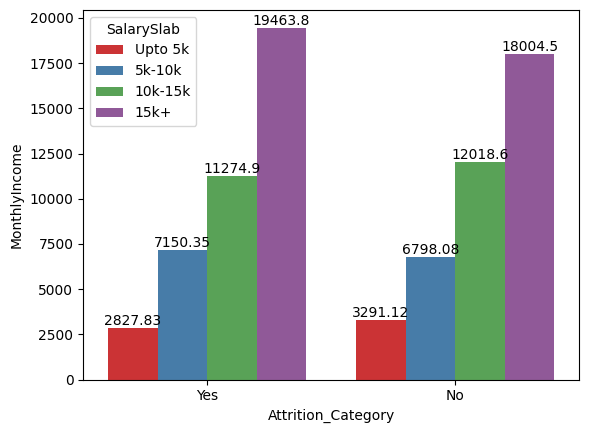

In [32]:
ax = sns.barplot(data = df, x = 'Attrition_Category', y = 'MonthlyIncome', hue = 'SalarySlab', palette = 'Set1', ci = None)

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [33]:
import plotly.express as px

# Calculate mean MonthlyIncome for each Attrition_Category × SalarySlab
mean_income = df.groupby(['Attrition_Category', 'SalarySlab'], as_index=False)['MonthlyIncome'].mean()

# Create Plotly grouped bar chart
fig = px.bar(mean_income,
             x='Attrition_Category',
             y='MonthlyIncome',
             color='SalarySlab',
             barmode='group',
             text='MonthlyIncome',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize chart
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(
    title='Average Monthly Income by Attrition Category and Salary Slab',
    xaxis_title='Attrition Category',
    yaxis_title='Average Monthly Income',
    width=900,
    height=500,
    legend_title='Salary Slab'
)

fig.show()


The salaries of the employees who left the company are very high. Their salaries are higher than those employees who still working in the company.

### Count of Attrition by PercentSalaryHike

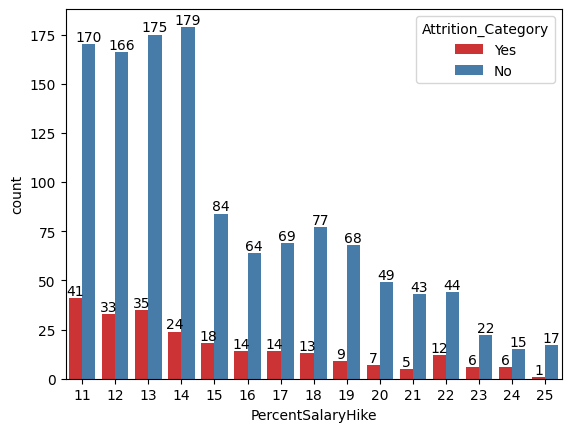

In [34]:
ax = sns.countplot(data = df, x = "PercentSalaryHike", hue = 'Attrition_Category', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [35]:
import plotly.express as px

# Group data to get counts for each PercentSalaryHike × Attrition_Category
grouped_counts = df.groupby(['PercentSalaryHike', 'Attrition_Category']).size().reset_index(name='Count')

# Create interactive Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='PercentSalaryHike',
             y='Count',
             color='Attrition_Category',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize chart layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Attrition Count by Percent Salary Hike',
    xaxis_title='Percent Salary Hike',
    yaxis_title='Count',
    legend_title='Attrition Category',
    width=950,
    height=500
)

fig.show()


The employees who left the company have lower percent salary hike rate.

### Count of Attrition by StockOptionLevel

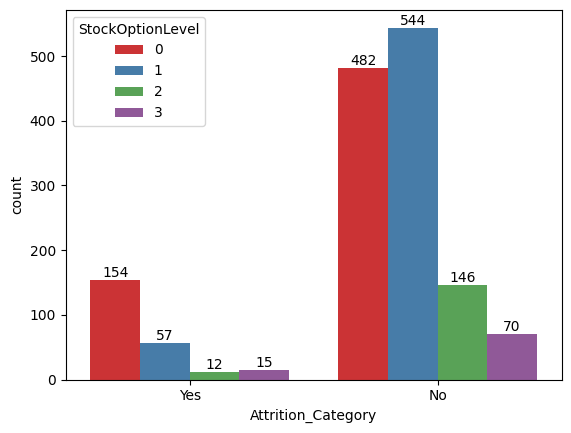

In [36]:
ax = sns.countplot(data = df, x = "Attrition_Category", hue = 'StockOptionLevel', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [37]:
import plotly.express as px

# (Optional) Map StockOptionLevel numbers to meaningful labels
stock_option_map = {
    0: 'No Stock Options',
    1: 'Low',
    2: 'Medium',
    3: 'High'
}
df['StockOptionLevel_Mapped'] = df['StockOptionLevel'].map(stock_option_map)

# Group data to get counts for each Attrition_Category × StockOptionLevel
grouped_counts = df.groupby(['Attrition_Category', 'StockOptionLevel_Mapped']).size().reset_index(name='Count')

# Create interactive Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='Attrition_Category',
             y='Count',
             color='StockOptionLevel_Mapped',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize chart layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Attrition Count by Stock Option Level',
    xaxis_title='Attrition Category',
    yaxis_title='Count',
    legend_title='Stock Option Level',
    width=900,
    height=500
)

fig.show()


The 65% of employees who left the company have no Stock Options. 24% of employees who have low stock option level also left the company.

### Count of Attrition by TrainingTimesLastYear

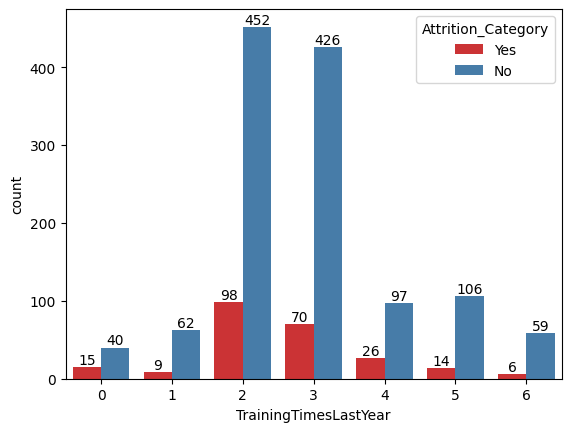

In [38]:
ax = sns.countplot(data = df, x = "TrainingTimesLastYear", hue = 'Attrition_Category', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [39]:
import plotly.express as px

# Group data to get counts for each TrainingTimesLastYear × Attrition_Category
grouped_counts = df.groupby(['TrainingTimesLastYear', 'Attrition_Category']).size().reset_index(name='Count')

# Create interactive Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='TrainingTimesLastYear',
             y='Count',
             color='Attrition_Category',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Count of Employees by Training Times Last Year (Attrition Split)',
    xaxis_title='Training Times Last Year',
    yaxis_title='Count',
    legend_title='Attrition Category',
    width=900,
    height=500
)

fig.show()


The 41% employees who left the company had attended the 2 Training sessions and 29% employees who left the company had attended the 3 Training Sessions. Most of the employees are those who attented 2 and 3 Training Sessions.

### Count of Attrition by WorkLifeBalance

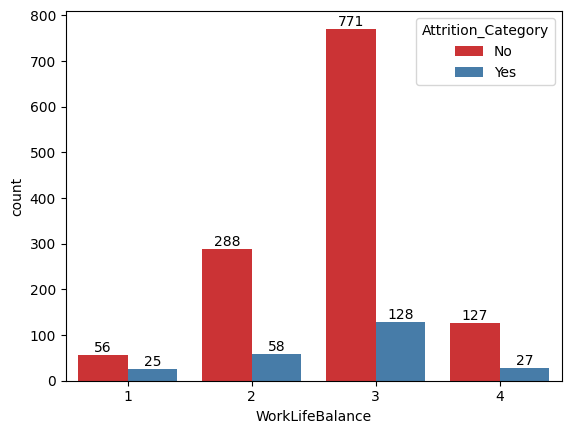

In [40]:
ax = sns.countplot(data = df, x = "WorkLifeBalance", hue = 'Attrition_Category', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [41]:
import plotly.express as px

# Map numeric values to descriptive labels
worklife_map = {
    1: "Bad – Very Poor",
    2: "Good – Manageable",
    3: "Better – Generally Good",
    4: "Best – Excellent"
}
df['WorkLifeBalance_Mapped'] = df['WorkLifeBalance'].map(worklife_map)

# Group data for counts
grouped_counts = df.groupby(['WorkLifeBalance_Mapped', 'Attrition_Category']).size().reset_index(name='Count')

# Create Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='WorkLifeBalance_Mapped',
             y='Count',
             color='Attrition_Category',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Attrition by Work-Life Balance',
    xaxis_title='Work-Life Balance',
    yaxis_title='Employee Count',
    legend_title='Attrition Category',
    xaxis={'categoryorder':'array', 'categoryarray': ["Bad – Very Poor", "Good – Manageable", "Better – Generally Good", "Best – Excellent"]},
    width=950,
    height=500
)

fig.show()


The 54% of employee who left the company have Better work-life balance and 24% of employees have Good work-life balance.

### Count of Attrition by YearsatCompany

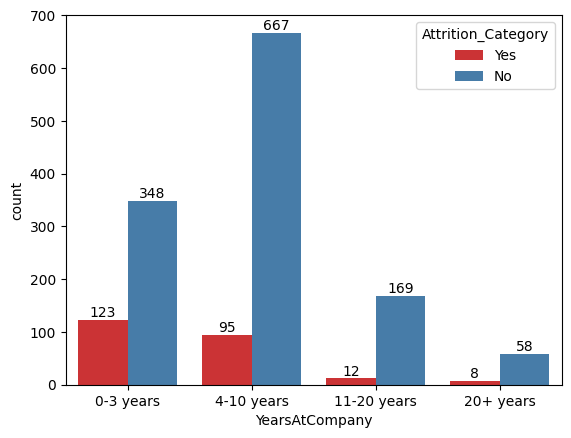

In [42]:
ax = sns.countplot(data = df, x = "YearsAtCompany", hue = 'Attrition_Category', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [43]:
import plotly.express as px

# Group data to get counts for each YearsAtCompany × Attrition_Category
grouped_counts = df.groupby(['YearsAtCompany', 'Attrition_Category']).size().reset_index(name='Count')

# Create Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='YearsAtCompany',
             y='Count',
             color='Attrition_Category',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Employee Count by Years at Company (Attrition Split)',
    xaxis_title='Years at Company',
    yaxis_title='Employee Count',
    legend_title='Attrition Category',
    width=1000,
    height=500
)

fig.show()


The 52% of employees who left the company had been working for 0 to 3 years and 40% had been working for 4 to 10 years.

### Count of Attrition by YearsInCurrentRole

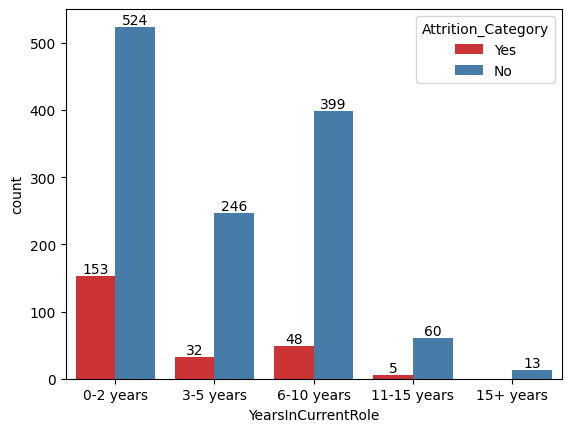

In [44]:
ax = sns.countplot(data = df, x = "YearsInCurrentRole", hue = 'Attrition_Category', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [45]:
import plotly.express as px

# Group data to get counts for each YearsInCurrentRole × Attrition_Category
grouped_counts = df.groupby(['YearsInCurrentRole', 'Attrition_Category']).size().reset_index(name='Count')

# Create Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='YearsInCurrentRole',
             y='Count',
             color='Attrition_Category',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Employee Count by Years in Current Role (Attrition Split)',
    xaxis_title='Years in Current Role',
    yaxis_title='Employee Count',
    legend_title='Attrition Category',
    width=1000,
    height=500
)

fig.show()


The 64% of employees who left the company had been working for 0 to 2 years in the same role and 20% had been working for 6 to 10 years in the same role and 13% had been working for 3 to 5 years in the same role.

### Count of Attrition by YearsSinceLastPromotion

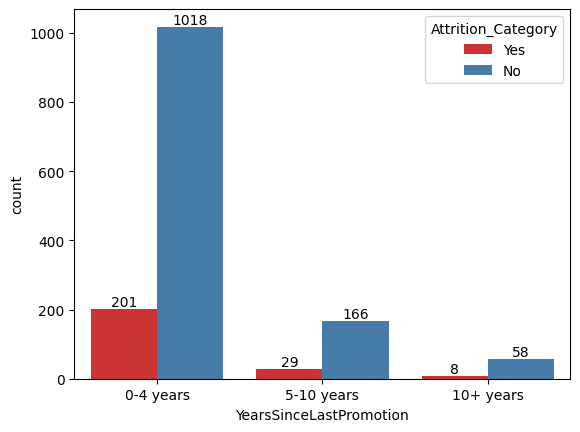

In [48]:
ax = sns.countplot(data = df, x = "YearsSinceLastPromotion", hue = 'Attrition_Category', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [46]:
import plotly.express as px

# Group data to get counts for each YearsSinceLastPromotion × Attrition_Category
grouped_counts = df.groupby(['YearsSinceLastPromotion', 'Attrition_Category']).size().reset_index(name='Count')

# Create Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='YearsSinceLastPromotion',
             y='Count',
             color='Attrition_Category',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Employee Count by Years Since Last Promotion (Attrition Split)',
    xaxis_title='Years Since Last Promotion',
    yaxis_title='Employee Count',
    legend_title='Attrition Category',
    width=1000,
    height=500
)

fig.show()


The 84% of employees who left the company had been working for 0 to 4 years since their last promotion. 0 to 4 years have very high percentage.

### Count of Attrition by YearsWithCurrManager

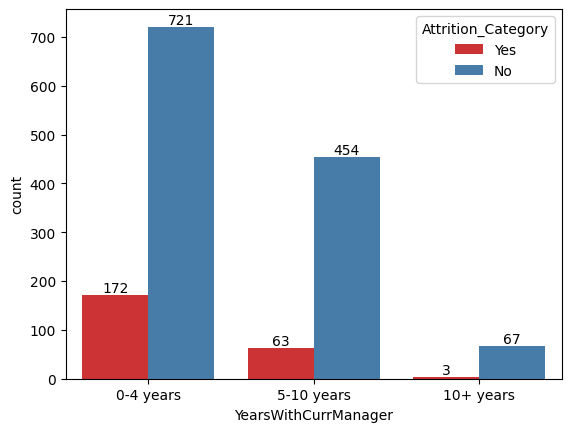

In [49]:
ax = sns.countplot(data = df, x = "YearsWithCurrManager", hue = 'Attrition_Category', palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

#### Plotly Code

In [47]:
import plotly.express as px

# Group data to get counts for each YearsWithCurrManager × Attrition_Category
grouped_counts = df.groupby(['YearsWithCurrManager', 'Attrition_Category']).size().reset_index(name='Count')

# Create Plotly grouped bar chart
fig = px.bar(grouped_counts,
             x='YearsWithCurrManager',
             y='Count',
             color='Attrition_Category',
             barmode='group',
             text='Count',
             color_discrete_sequence=px.colors.qualitative.Set1)

# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title='Employee Count by Years with Current Manager (Attrition Split)',
    xaxis_title='Years with Current Manager',
    yaxis_title='Employee Count',
    legend_title='Attrition Category',
    width=1000,
    height=500
)

fig.show()


The 72% of employees who left the company had been working for 0 to 4 years with the current manager. 26% of employees had been working for 5 to 10 years with the current manager.

#### Conclusion

The analysis shows that the main factors affecting employee attrition are job role, department, gender, satisfaction with the work environment, and income levels. Attrition is especially high among Laboratory Technicians and Sales Executives, while the Research and Development department is most affected overall. Male employees are more likely to leave than females, and those who are dissatisfied with their work environment also tend to leave at a higher rate. Additionally, workers in lower salary ranges are more likely to exit the organization. On the other hand, factors such as education level, job satisfaction, and relationship satisfaction have little impact on attrition, suggesting they do not significantly influence employee turnover.